In [110]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [111]:
#read initial csv into a dataframe
csv_file = 'Main Avocado Tree (Resources)/avocado-updated-2020.csv'
avocado_df = pd.read_csv(csv_file)
avocado_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [112]:
#read income csv into a dataframe
csv_income = 'Main Avocado Tree (Resources)/income per metropolitan area.csv'
income_df = pd.read_csv(csv_income)
income_df.head()

,Geography,State,Year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [113]:
#Rename columns to match those in Avocado
rename_income_df = income_df.rename(columns={"Geography": "geography", "Year":"year"})
rename_income_df.head()

,geography,State,year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [114]:
#Merge the two dataframes together on Geography and year
merged_df = pd.merge(avocado_df,rename_income_df, on=['geography', 'year'], how='inner')
merged_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,State,Per capita personal income
0,2017-01-01,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,GA,36780
1,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,Albany,GA,36780
2,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,GA,36780
3,2017-01-08,1.94,2229.52,63.46,478.31,0.00,1687.75,1687.75,0.00,0.00,organic,2017,Albany,GA,36780
4,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,GA,36780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2019-12-15,1.34,3895.70,253.86,130.50,0.00,3511.34,1161.84,2349.50,0.00,organic,2019,Syracuse,NY,52051
3076,2019-12-22,1.09,75058.95,3277.09,42043.81,50.00,29688.05,9821.50,18648.77,1217.78,conventional,2019,Syracuse,NY,52051
3077,2019-12-22,1.58,2610.75,124.88,72.44,0.00,2413.43,1181.44,1231.99,0.00,organic,2019,Syracuse,NY,52051
3078,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,1032.23,conventional,2019,Syracuse,NY,52051


In [115]:
#Changing Date to ONLY reflect the month
split_cols = merged_df['date'].str.split('-',expand=True)
split_cols.columns = [f'Split-{i}' for i in range(3)]
new_merge = merged_df.join(split_cols)
new_merge

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,State,Per capita personal income,Split-0,Split-1,Split-2
0,2017-01-01,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,GA,36780,2017,01,01
1,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,Albany,GA,36780,2017,01,01
2,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,GA,36780,2017,01,08
3,2017-01-08,1.94,2229.52,63.46,478.31,0.00,1687.75,1687.75,0.00,0.00,organic,2017,Albany,GA,36780,2017,01,08
4,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,GA,36780,2017,01,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2019-12-15,1.34,3895.70,253.86,130.50,0.00,3511.34,1161.84,2349.50,0.00,organic,2019,Syracuse,NY,52051,2019,12,15
3076,2019-12-22,1.09,75058.95,3277.09,42043.81,50.00,29688.05,9821.50,18648.77,1217.78,conventional,2019,Syracuse,NY,52051,2019,12,22
3077,2019-12-22,1.58,2610.75,124.88,72.44,0.00,2413.43,1181.44,1231.99,0.00,organic,2019,Syracuse,NY,52051,2019,12,22
3078,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,1032.23,conventional,2019,Syracuse,NY,52051,2019,12,29


In [116]:
#make it pretty
renamed_merge = new_merge.rename(columns={'Split-1':'month', 'geography':'city'})
clean_merge = renamed_merge[['month', 'year', 'city', 'average_price', 'total_volume','Per capita personal income', '4046', '4225', '4770', 'type']]
clean_merge.head()

,month,year,city,average_price,total_volume,Per capita personal income,4046,4225,4770,type
0,01,2017,Albany,1.47,129948.23,36780,4845.77,117027.41,200.36,conventional
1,01,2017,Albany,1.87,1376.70,36780,71.65,192.63,0.00,organic
2,01,2017,Albany,1.55,91728.18,36780,3355.47,75641.23,56.91,conventional
3,01,2017,Albany,1.94,2229.52,36780,63.46,478.31,0.00,organic
4,01,2017,Albany,1.55,88526.26,36780,3327.65,71956.77,607.03,conventional


In [117]:
#get averages for each city per month per year, essentially condense all the data points per month into one averaged value
grouped_by_month = pd.DataFrame(clean_merge.groupby(["month", "year", "city"]).mean().round(2))
grouped_by_month

average_price  total_volume  \
month year city                                        
01    2017 Albany                 1.68      54358.82   
           Columbus               1.19     103980.44   
           Jacksonville           1.15     107069.50   
           Pittsburgh             1.27      77289.99   
           Roanoke                1.24      78387.93   
...                                ...           ...   
12    2019 Jacksonville           1.06     107512.27   
           Pittsburgh             1.17      57142.35   
           Roanoke                1.17      77754.44   
           St. Louis              1.56      81912.20   
           Syracuse               1.23      37224.86   

                         Per capita personal income      4046      4225  \
month year city                                                           
01    2017 Albany                           36780.0   1982.22  45536.40   
           Columbus                         45770.0  42977.32  21063.61   
           Jacksonville                     46548.0  38759.31  18161.83   
           Pittsburgh                       54583.0  30653.04  21360.52   
           Roanoke                          45414.0  22522.70  24783.98   
...                                             ...       ...       ...   
12    2019 Jacksonville                     49473.0  40987.00   3618.60   
           Pittsburgh                       60227.0  18727.12   3407.87   
           Roanoke                          48374.0  23523.37  11122.82   
           St. Louis                        56923.0  35349.91   5267.02   
           Syracuse                         52051.0   1607.66  20664.96   

                            4770  
month year city                   
01    2017 Albany         354.06  
           Columbus      1282.62  
           Jacksonville   130.69  
           Pittsburgh    1303.86  
           Roanoke         60.18  
...                          ...  
12    2019 Jacksonville   257.46  
           Pittsburgh     148.89  
           Roanoke         33.90  
           St. Louis      228.53  
           Syracuse        17.74  

[252 rows x 6 columns]

In [118]:
something_else = pd.DataFrame(clean_merge.loc[:, ["year", "month", "average_price"]])
something_else

,year,month,average_price
0,2017,01,1.47
1,2017,01,1.87
2,2017,01,1.55
3,2017,01,1.94
4,2017,01,1.55
...,...,...,...
3075,2019,12,1.34
3076,2019,12,1.09
3077,2019,12,1.58
3078,2019,12,1.12


In [119]:
#something_else["year_month"] = something_else["year"] + df["quarter"]
something_else["year_month"] = something_else["year"].astype(str) + something_else["month"].astype(str)
something_else["year_month"] = pd.to_numeric(something_else["year_month"])
something_else

,year,month,average_price,year_month
0,2017,01,1.47,201701
1,2017,01,1.87,201701
2,2017,01,1.55,201701
3,2017,01,1.94,201701
4,2017,01,1.55,201701
...,...,...,...,...
3075,2019,12,1.34,201912
3076,2019,12,1.09,201912
3077,2019,12,1.58,201912
3078,2019,12,1.12,201912


In [120]:
data_2017 = clean_merge[clean_merge["year"] == 2017]
month_2017 = pd.DataFrame(data_2017)
month_2017 = pd.DataFrame(data_2017.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2017['month'] = months_list
month_2017 = month_2017[["year", "average_price", "month"]]
month_2017

,year,average_price,month
month,,,
01,2017.0,1.29,1
02,2017.0,1.20,2
03,2017.0,1.35,3
04,2017.0,1.48,4
05,2017.0,1.51,5
06,2017.0,1.48,6
07,2017.0,1.52,7
08,2017.0,1.67,8
09,2017.0,1.85,9


In [121]:
data_2018 = clean_merge[clean_merge["year"] == 2018]
month_2018 = pd.DataFrame(data_2018)
month_2018 = pd.DataFrame(data_2018.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2018['month'] = months_list
month_2018 = month_2018[["year", "average_price", "month"]]
month_2018

,year,average_price,month
month,,,
01,2018.0,1.31,1
02,2018.0,1.30,2
03,2018.0,1.31,3
04,2018.0,1.29,4
05,2018.0,1.23,5
06,2018.0,1.21,6
07,2018.0,1.26,7
08,2018.0,1.38,8
09,2018.0,1.44,9


In [122]:
data_2019 = clean_merge[clean_merge["year"] == 2019]
month_2019 = pd.DataFrame(data_2019)
month_2019 = pd.DataFrame(data_2019.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2019['month'] = months_list
month_2019 = month_2019[["year", "average_price", "month"]]
month_2019

,year,average_price,month
month,,,
01,2019.0,1.18,1
02,2019.0,1.15,2
03,2019.0,1.18,3
04,2019.0,1.40,4
05,2019.0,1.43,5
06,2019.0,1.46,6
07,2019.0,1.71,7
08,2019.0,1.50,8
09,2019.0,1.31,9


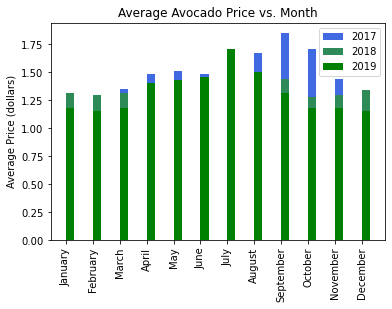

In [148]:
#look at bar graphs comparing months
n = 12
width = 0.3
month_names2 = np.arange(n)

bar_2017 = month_2017["average_price"]
bar_2018 = month_2018["average_price"]
bar_2019 = month_2019["average_price"]

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(month_names2+width, bar_2017, width, color='royalblue')
rects2 = ax.bar(month_names2+width, bar_2018, width, color='seagreen')
rects3 = ax.bar(month_names2+width, bar_2019, width, color='g')
plt.ylabel('Average Price (dollars)')
plt.title('Average Avocado Price vs. Month')
labels = ('2017', '2018', '2019')
plt.legend(labels=labels,loc='best')
plt.xticks(month_names2 + width / 2, ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation=90)
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphics.png')
plt.show()



Text(0, 0.5, 'Price (dollars)')

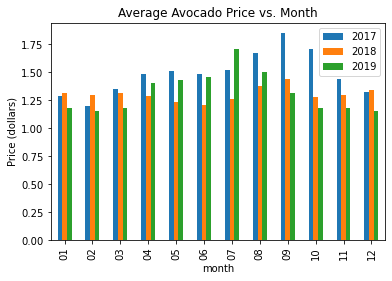

In [124]:
df = pd.DataFrame({'2017':bar_2017, '2018':bar_2018, '2019':bar_2019})
df.plot(kind='bar', stacked=False)
plt.title('Average Avocado Price vs. Month')
plt.ylabel('Price (dollars)')

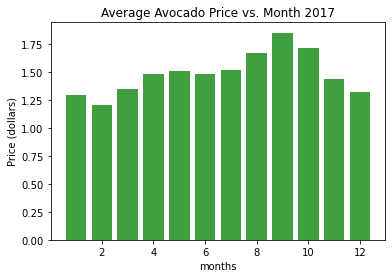

In [149]:
plt.bar(month_2017['month'], month_2017['average_price'], color='green', alpha=0.75)
plt.title('Average Avocado Price vs. Month 2017')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphics1.png')
plt.show()

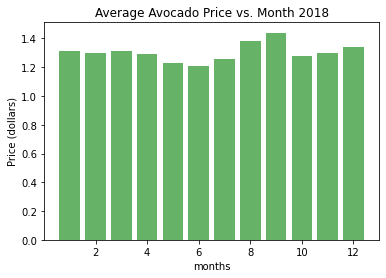

In [150]:
plt.bar(month_2018['month'], month_2018['average_price'], color='green', alpha=0.6)
plt.title('Average Avocado Price vs. Month 2018')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphics2.png')
plt.show()

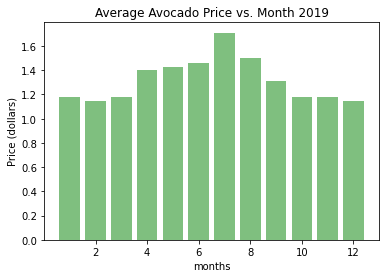

In [151]:
plt.bar(month_2019['month'], month_2019['average_price'], color='green', alpha=0.5)
plt.title('Average Avocado Price vs. Month 2019')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphics3.png')
plt.show()

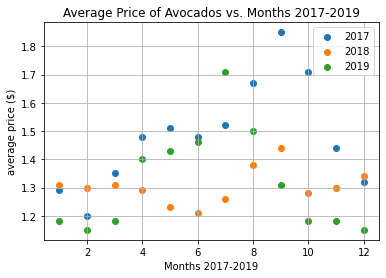

In [152]:
#show all scatter plots of year vs. average prices
plt.scatter(month_2017['month'], month_2017['average_price'])
plt.scatter(month_2018['month'], month_2018['average_price'])
plt.scatter(month_2019['month'], month_2019['average_price'])
plt.title('Average Price of Avocados vs. Months 2017-2019')
plt.xlabel('Months 2017-2019')
plt.ylabel('average price ($)')
plt.grid()
labels= ('2017', '2018', '2019')
plt.legend(labels=labels,loc='best')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphicsscatter.png')
plt.show()

The r-squared value is: 0.24623088315873423
The r-value is: 0.49621656880714315


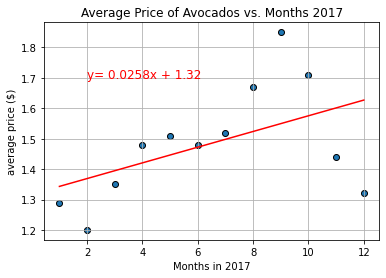

In [153]:
#linear regress 2017
x_values = month_2017['month']
y_values = month_2017['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2017['month'], month_2017['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')

plt.scatter(month_2017['month'], month_2017['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2017')
plt.xlabel('Months in 2017')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.7), fontsize=12, color='red')
plt.plot(month_2017['month'], res.intercept + res.slope*month_2017['month'], 'r', label='fitted line')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphicsscatter2017.png')
plt.show()

The r-squared value is: 0.07686028591747893
The r-value is: 0.2772368769075985


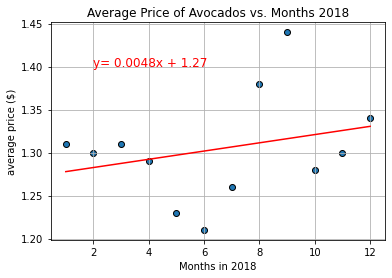

In [154]:
#linear regress 2018
x_values = month_2018['month']
y_values = month_2018['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2018['month'], month_2018['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')

plt.scatter(month_2018['month'], month_2018['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2018')
plt.xlabel('Months in 2018')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.40), fontsize=12, color='red')
plt.plot(month_2018['month'], res.intercept + res.slope*month_2018['month'], 'r', label='fitted line')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphicsscatter2018.png')
plt.show()

The r-squared value is: 1.2178129994555037e-05
The r-value is: -0.003489717752849797
Based on our linear regression we expect avocados to cost $ 1.32 in May 2021


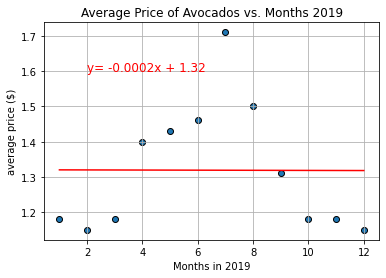

In [158]:
#linear regress 2019
x_values = month_2019['month']
y_values = month_2019['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2019['month'], month_2019['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')
print(f'Based on our linear regression we expect avocados to cost $ {round((-0.0002*5) + 1.32, 2)} in May 2021')
plt.scatter(month_2019['month'], month_2019['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2019')
plt.xlabel('Months in 2019')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.6), fontsize=12, color='red')
plt.plot(month_2019['month'], res.intercept + res.slope*month_2019['month'], 'r', label='fitted line')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphicsscatter2019.png')
plt.show()

In [132]:
# Question 1: Which cities love avocados most?

#Task 1: popularity of avocado, visual heatmap, 2015 to 2020, bar graph of volume per area 

In [133]:
#Question 2: Do states with higher income per capita buy more avocados? (income per capita from 2017-2019)

#Task 2: line graph (x-values states, y-values income per capita and avocado revenue) 

In [134]:
#Question 3: Which type of avocado is the biggest source of revenue for suppliers? Erica

#Task 3: Five pie charts by type (value = revenue) for each year on one png 

In [135]:
#Question 4: Is there a time of year that sees a spike in revenue? Erica

#Task 4: bar chart (x-values months, y-values avocado revenue)

In [136]:
#Question 5: How has the average avocado price changed over time?  What is the predicted avocado price for 2021 based on our data?  Bitty

#Task 5: scatter plot with regression to predict 2021 average price 

In [137]:
#Question 6: Do different types of avocados have different price trends? Arianne

#Task 6: facet (multiple lines on one) line graph (x-values = year, y-values = average price) for each type

In [138]:
#look at volume for 4046
plot_4046 = [['4046','year','average_price']]

In [139]:
#look at volume for 4225
plot_4225= [['4225', 'year', 'average_price']]

In [140]:
#Look at Volume for 4770
plot_4770 = [['4770', 'year', 'average_price']]
